# Fine-tuning YOLOv8 with Ultralytics

## Import dataset and libraries

In [ ]:
!pip install ultralytics

In [ ]:
import zipfile
import os

zip_file_path = './content/criminal_yolo_80_10_10.zip' # a modifier en fonction de votre fichier
extract_dir = './content/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Check if the zip file exists
if not os.path.exists(zip_file_path):
    print(f"Error: The file '{zip_file_path}' does not exist. Please check the path and file name.")
else:
    try:
        # Unzip the file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"'{zip_file_path}' unzipped to '{extract_dir}' successfully.")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file. It might be corrupted or in an unsupported format.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

'./content/criminal_yolo_80_10_10.zip' unzipped to './content/' successfully.


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8l.pt")

## Launch the model's training

The *.train()* method allows you to start training a model on new data, based on a pre-trained model.

Enable the GPU in your Colab environment and then start the training.

In [ ]:
!nvidia-smi

Tue Feb 17 11:07:47 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   75C    P0             34W /   70W |    3051MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# entraînement de base

name: str = "criminal_yolo"

# model.train(
#     data="./content/criminal_yolo/data.yaml",
#     epochs=100,  # Increased epochs for more training
#     imgsz=640,
#     batch=16,
#     device=0,
#     patience=0, # Increased patience as well
#     name=name,
# )

model.train(
    data='./content/criminal_yolo/data.yaml',
    name=name,
    epochs=100,
    imgsz=640,              # Stick to 640. 1280 is too heavy for 'Large' on small data
    batch=8,                # 'Large' uses a lot of VRAM. Reduce if you get CUDA errors.

    # --- CRITICAL FOR PREVENTING OVERFITTING ---
    freeze=15,              # FREEZE the first 15 layers.
                            # The 'Large' backbone is huge; you don't need to retrain it.
                            # You only want to train the detection head.

    dropout=0.3,            # Randomly disable 30% of neurons during training.
                            # This forces the model to not rely on single pixels.

    weight_decay=0.0005,    # Penalize complex weights to keep the model simple.

    # --- DATA AUGMENTATION ---
    mosaic=1.0,             # Keep this at 100%. You need to fake having more data.
    mixup=0.1,              # Blends 2 images together. Helps with "ghostly" features.

    # --- LEARNING DYNAMICS ---
    lr0=0.001,              # Start with a low learning rate.
    patience=20             # Stop if no improvement for 20 epochs.
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./content/criminal_yolo/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.3, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=15, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=criminal_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, persp

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf4dbfbdb80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Evaluer les performances du modèle fine-tuné

In [ ]:
metrics = model.val(data="./content/criminal_yolo/data.yaml", imgsz=640)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 113 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1009.0±311.8 MB/s, size: 32.7 KB)
val: Scanning /content/content/criminal_yolo/valid/labels.cache... 67 images, 18 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 85/85 25.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.6it/s 3.8s
                   all         85        150      0.465      0.753      0.514      0.373
              Innocent         55        104      0.627      0.702      0.675      0.523
              Criminal         37         46      0.303      0.804      0.352      0.223
Speed: 5.7ms preprocess, 32.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/runs/detect/val


Displaying training results from: ./runs/detect/criminal_yolo/results.png


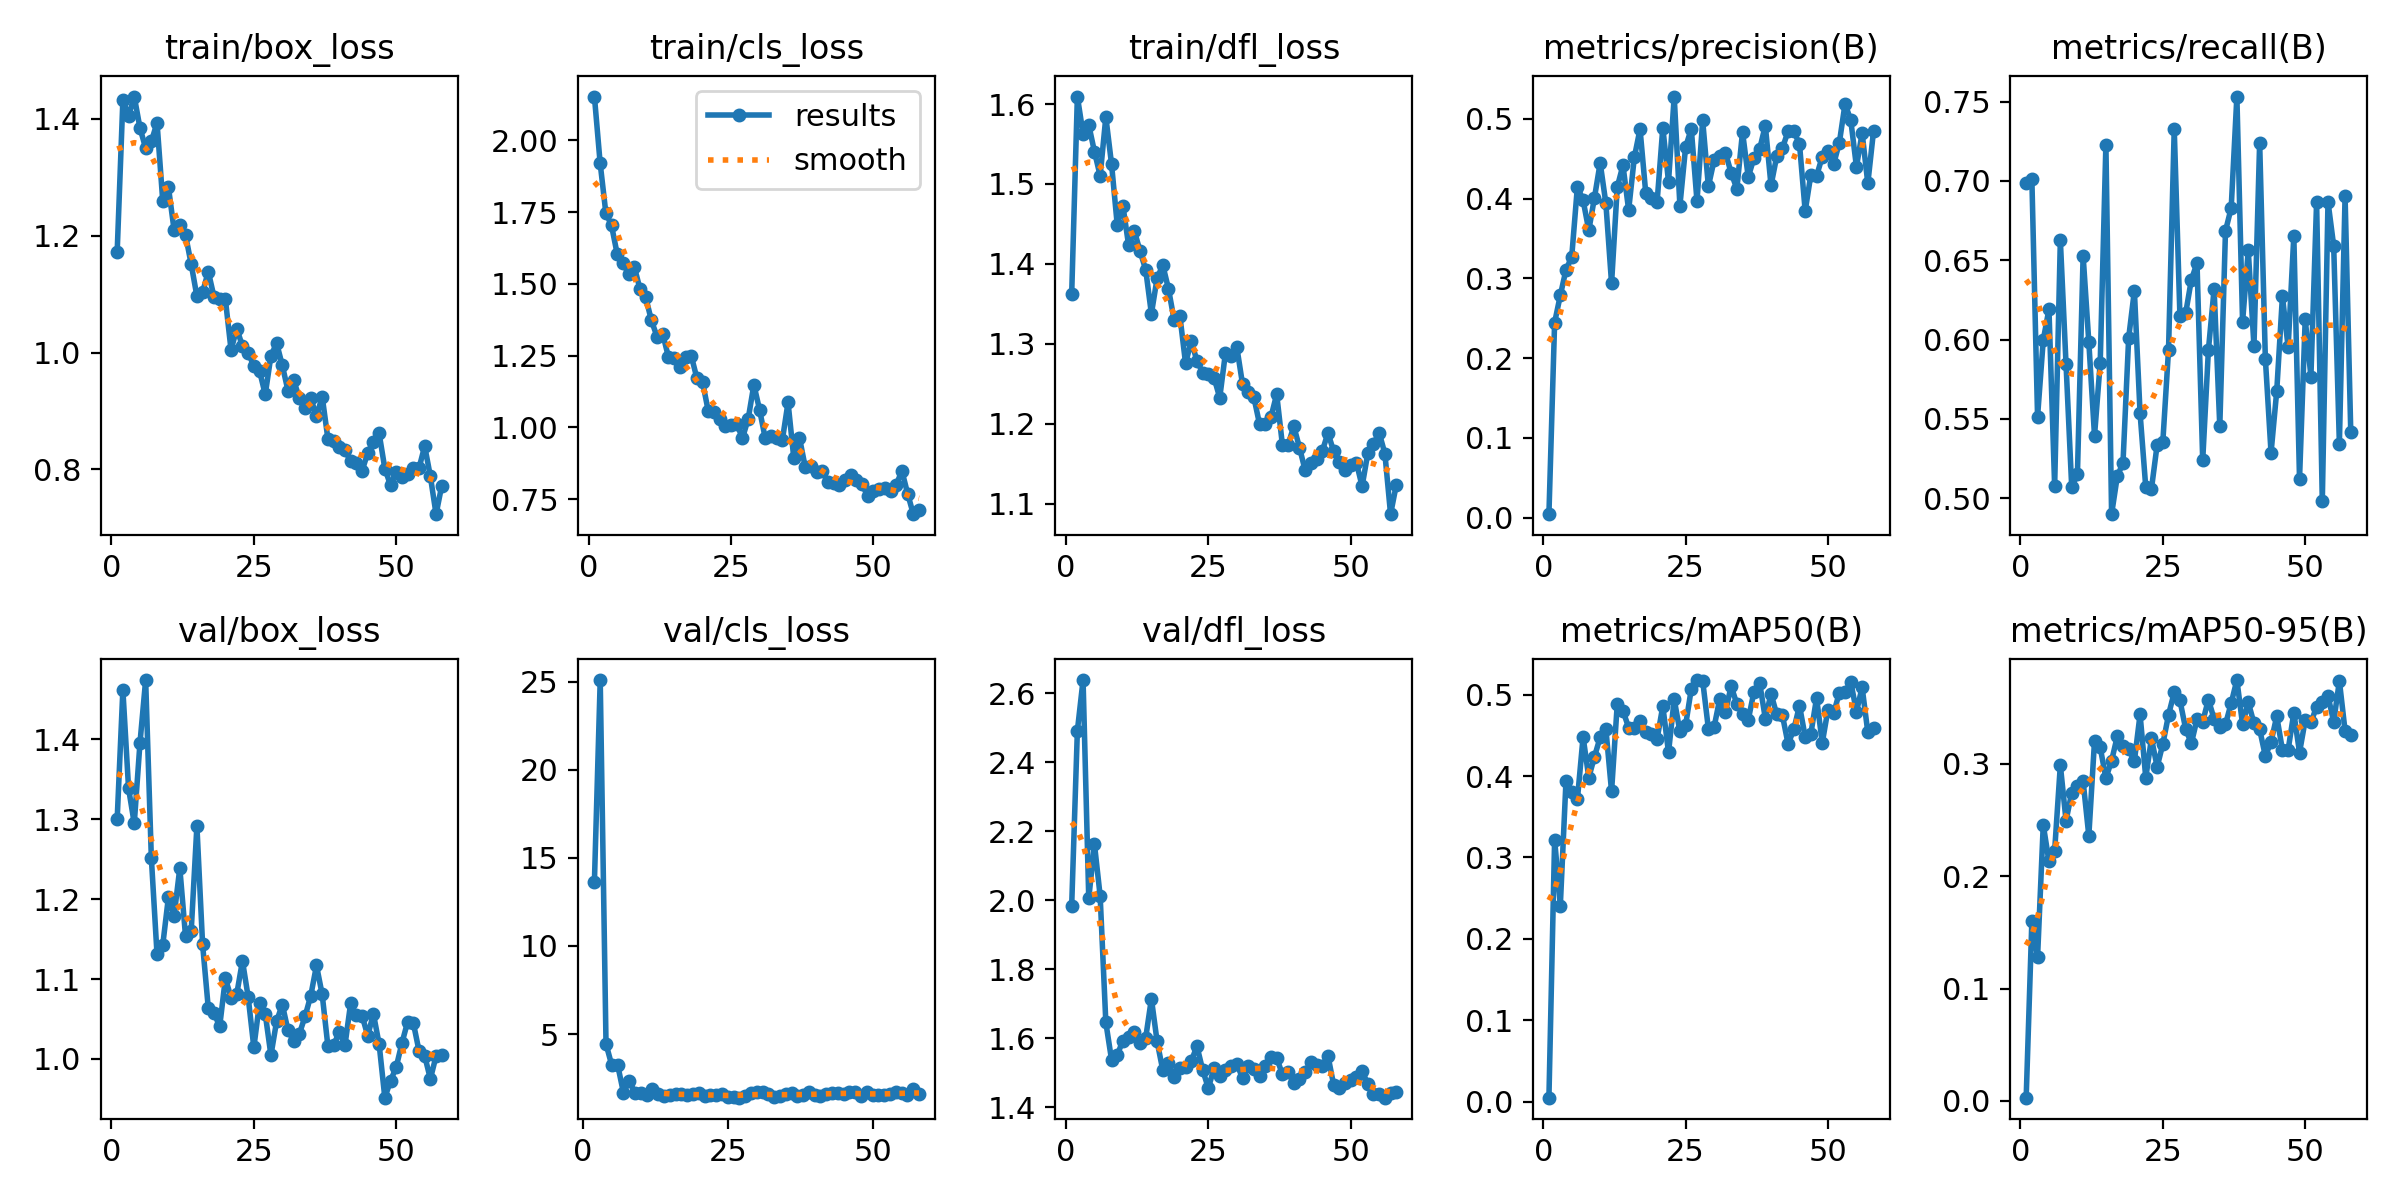

In [ ]:
from IPython.display import Image, display

results_dir = f'./runs/detect/{name}'

# Path to the results.png file
results_image_path = os.path.join(results_dir, 'results.png')

if os.path.exists(results_image_path):
    print(f"Displaying training results from: {results_image_path}")
    display(Image(filename=results_image_path, width=800))
else:
    print(f"Error: '{results_image_path}' not found. Please ensure the training plots were generated.")


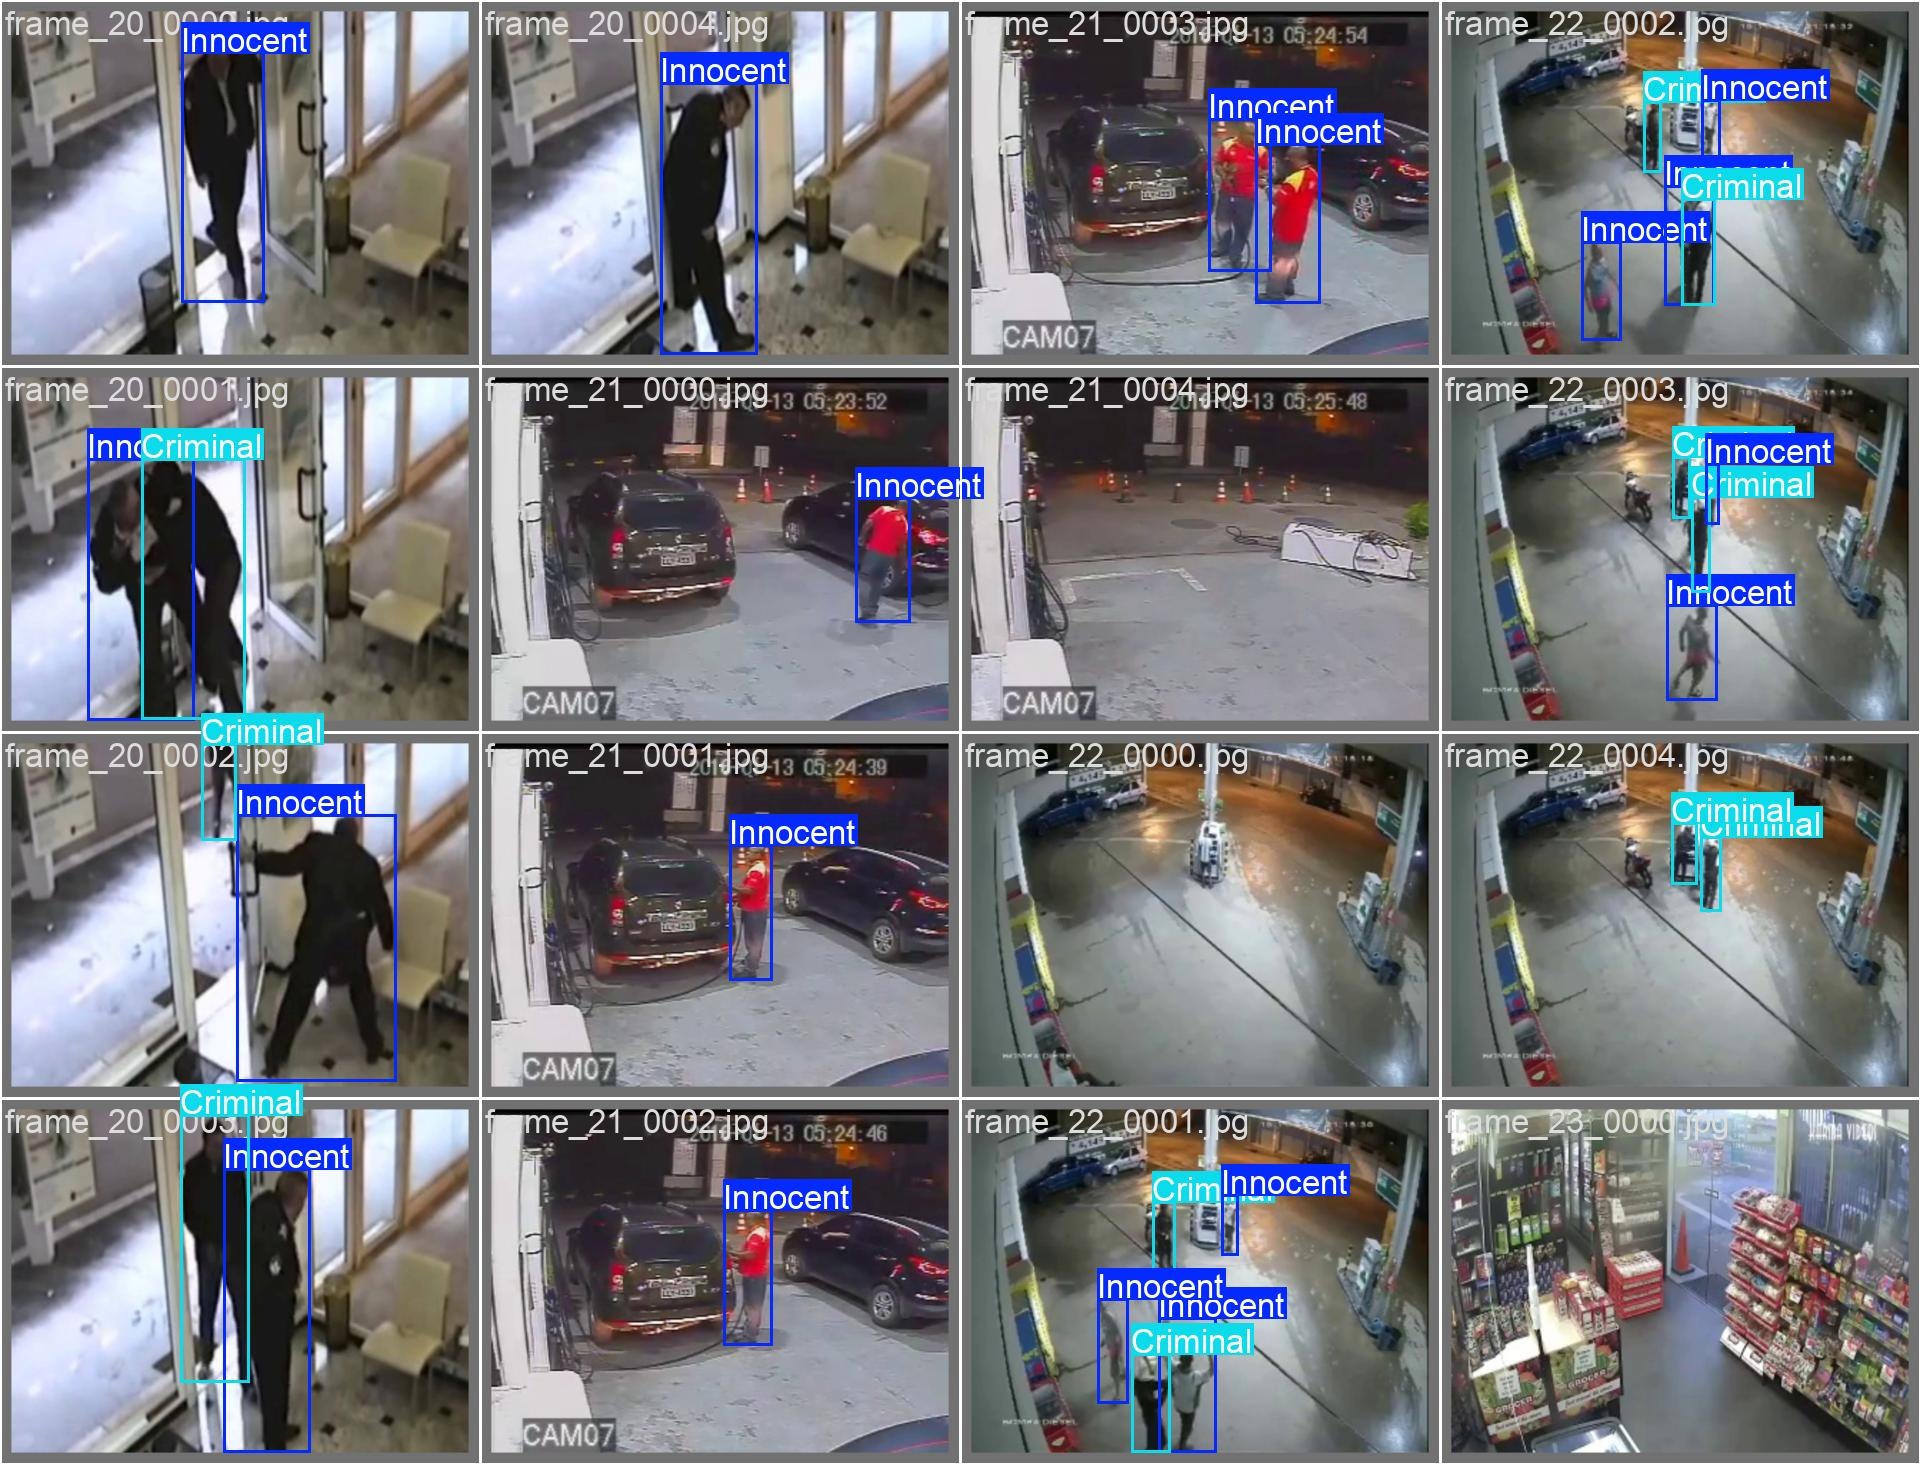
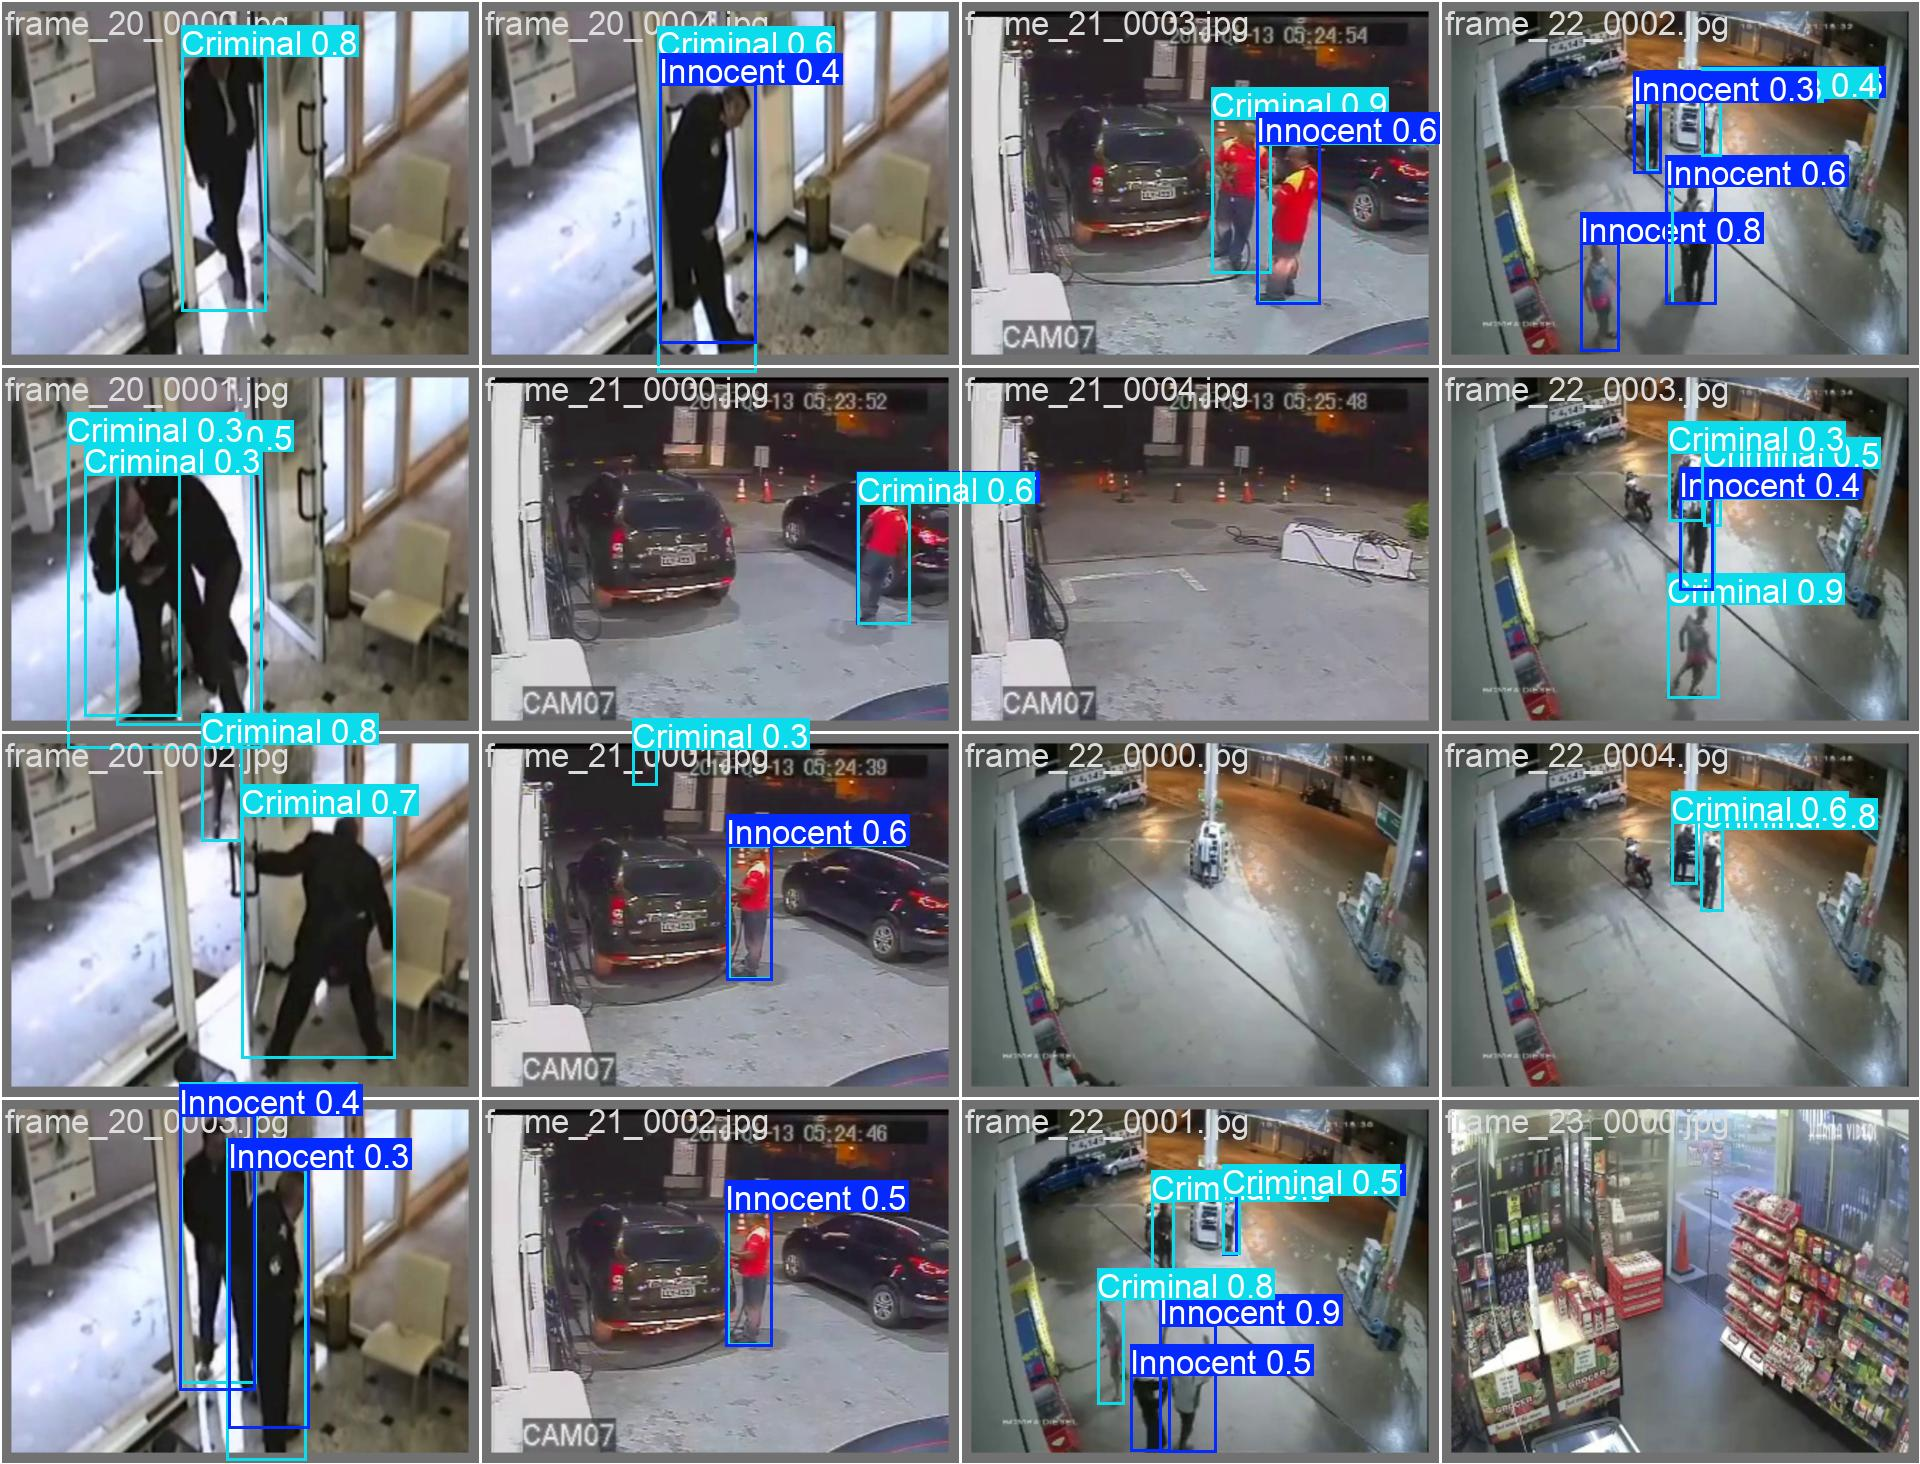


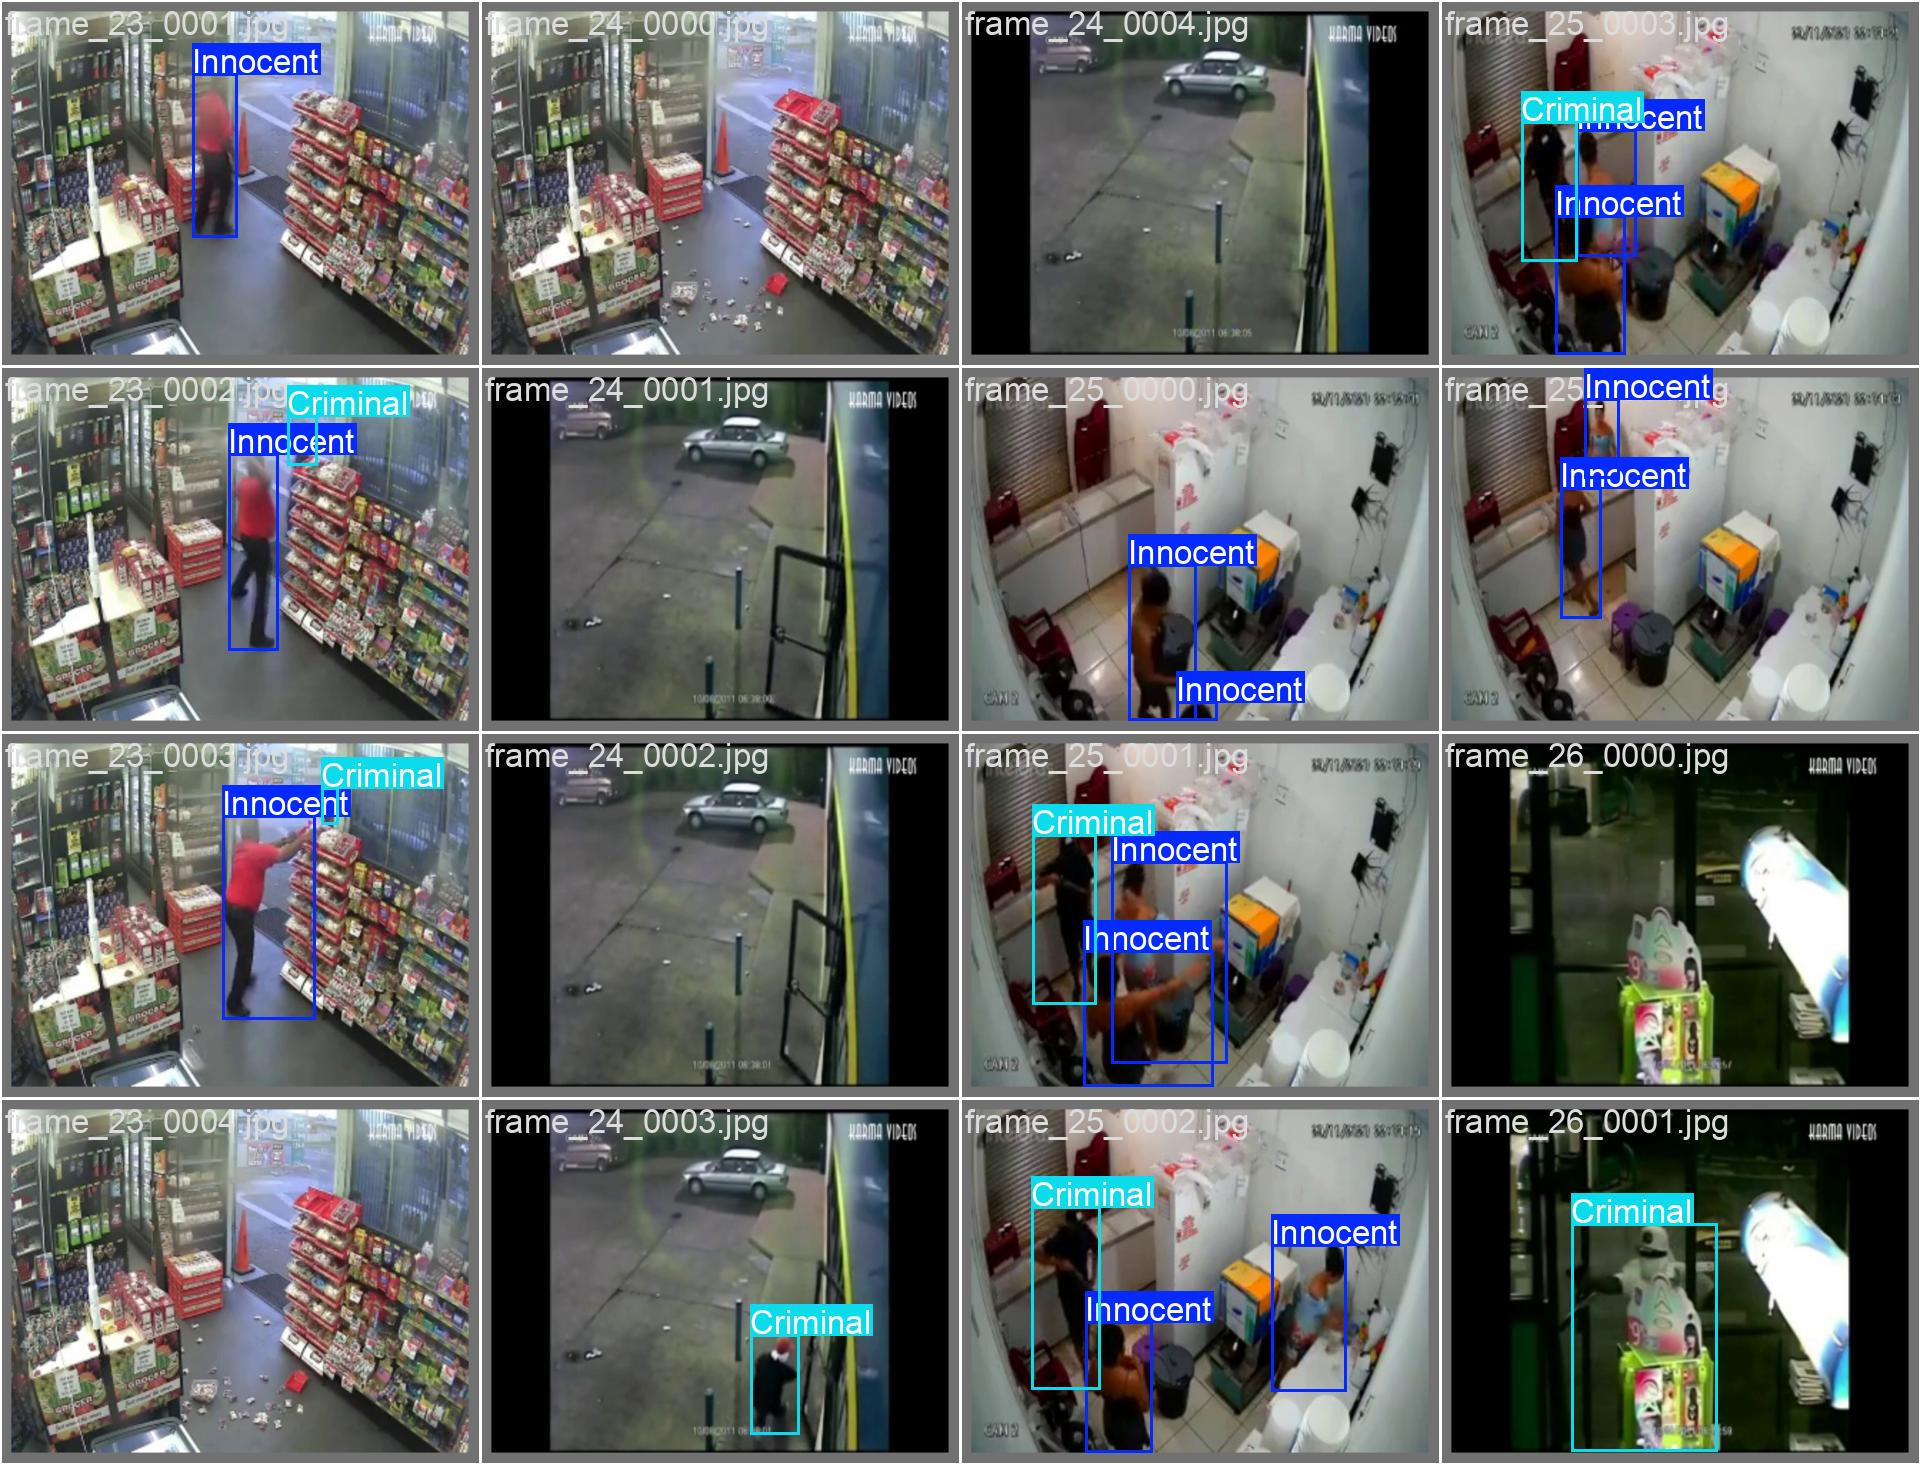
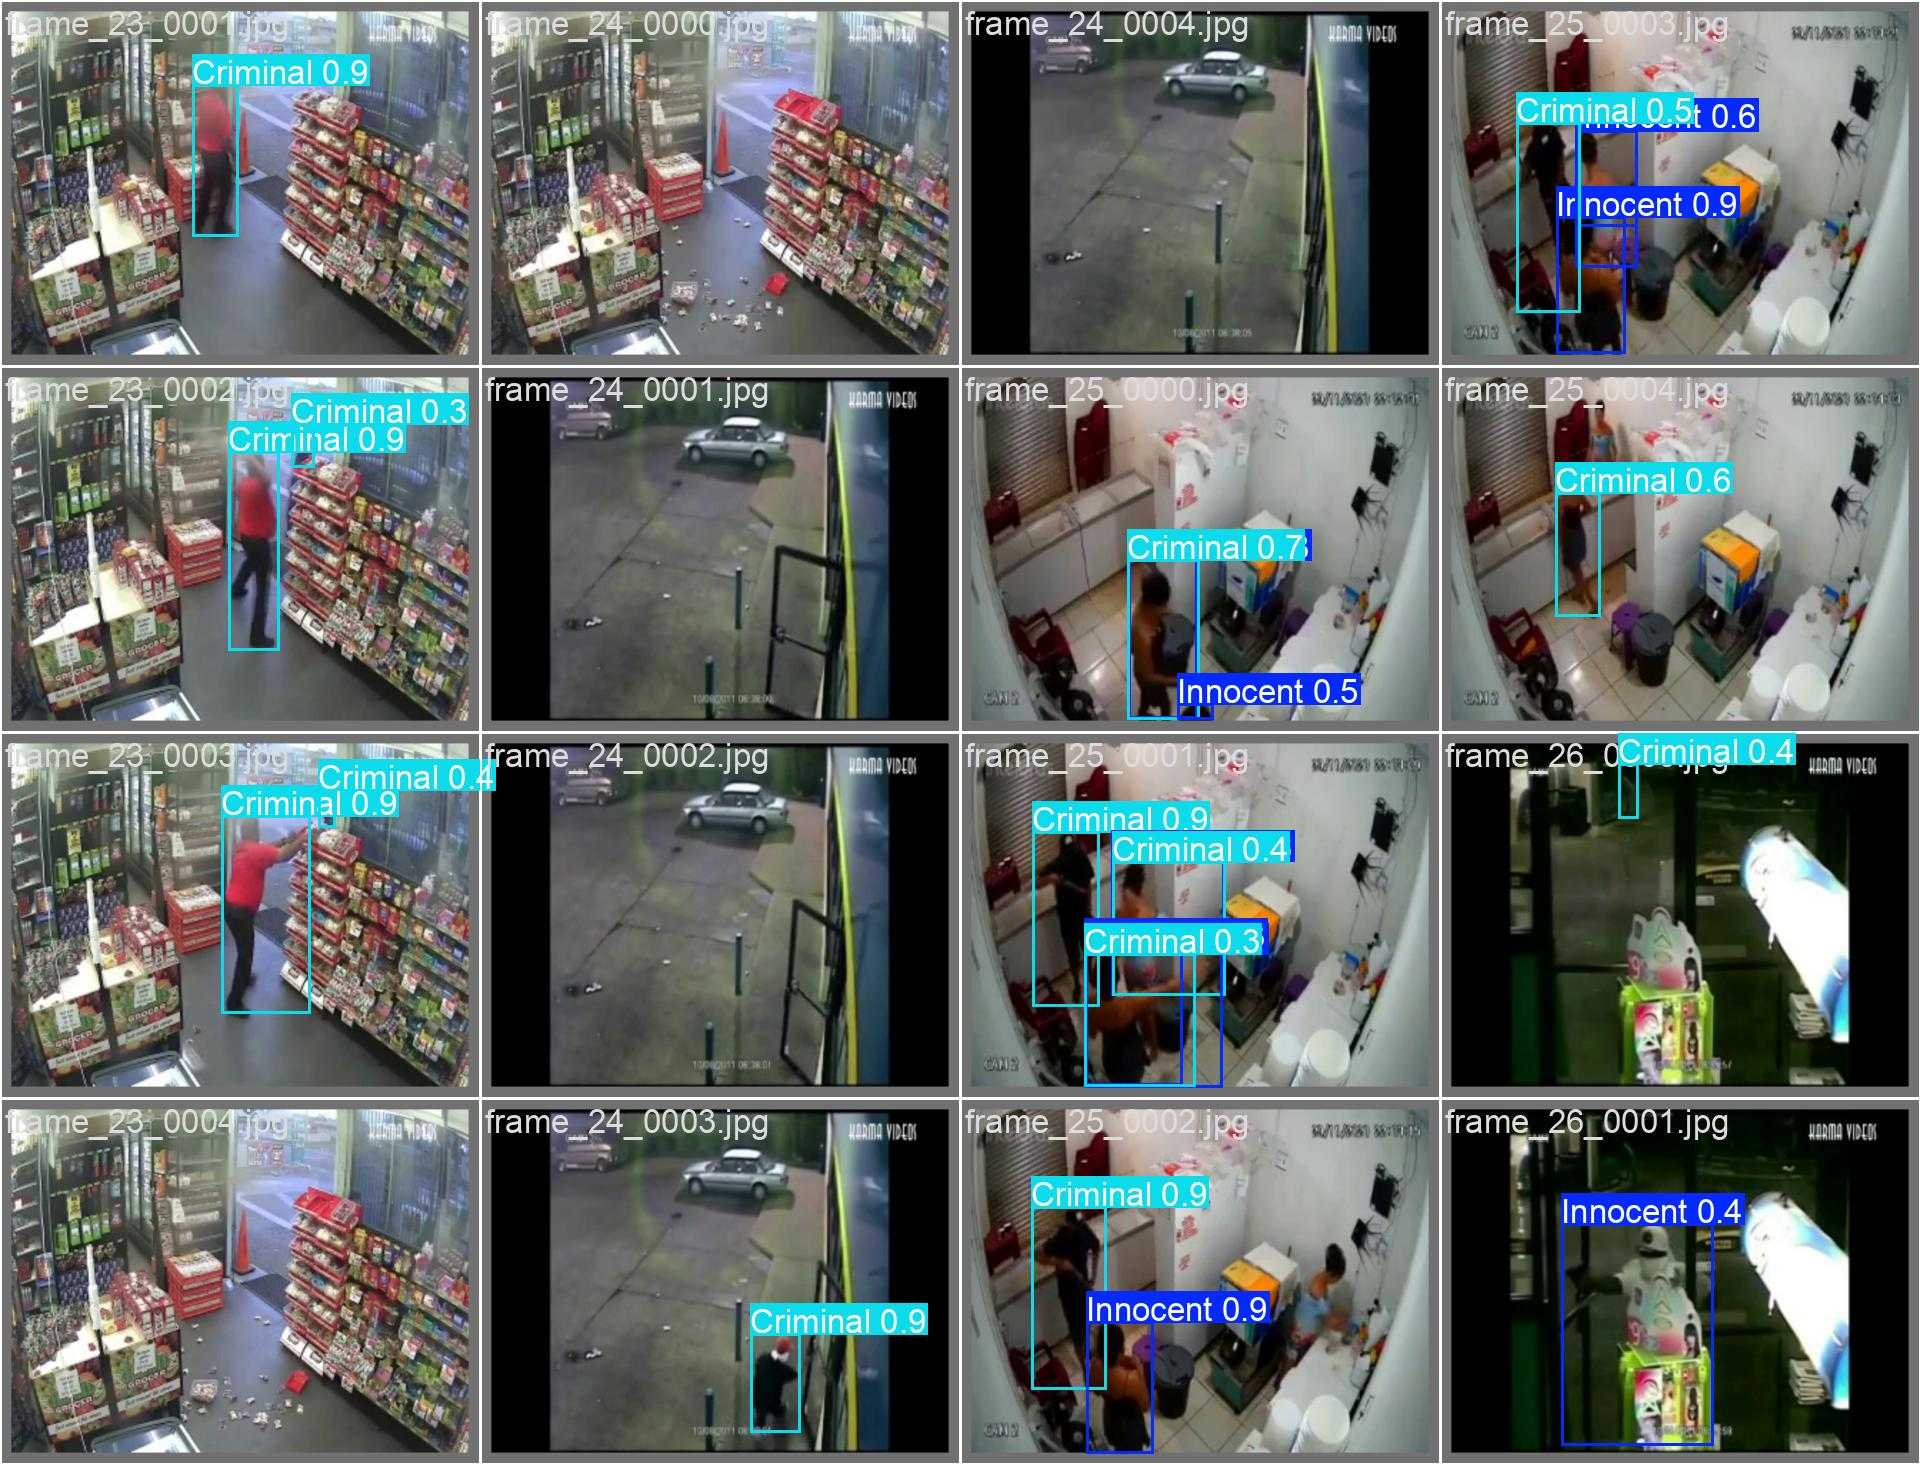


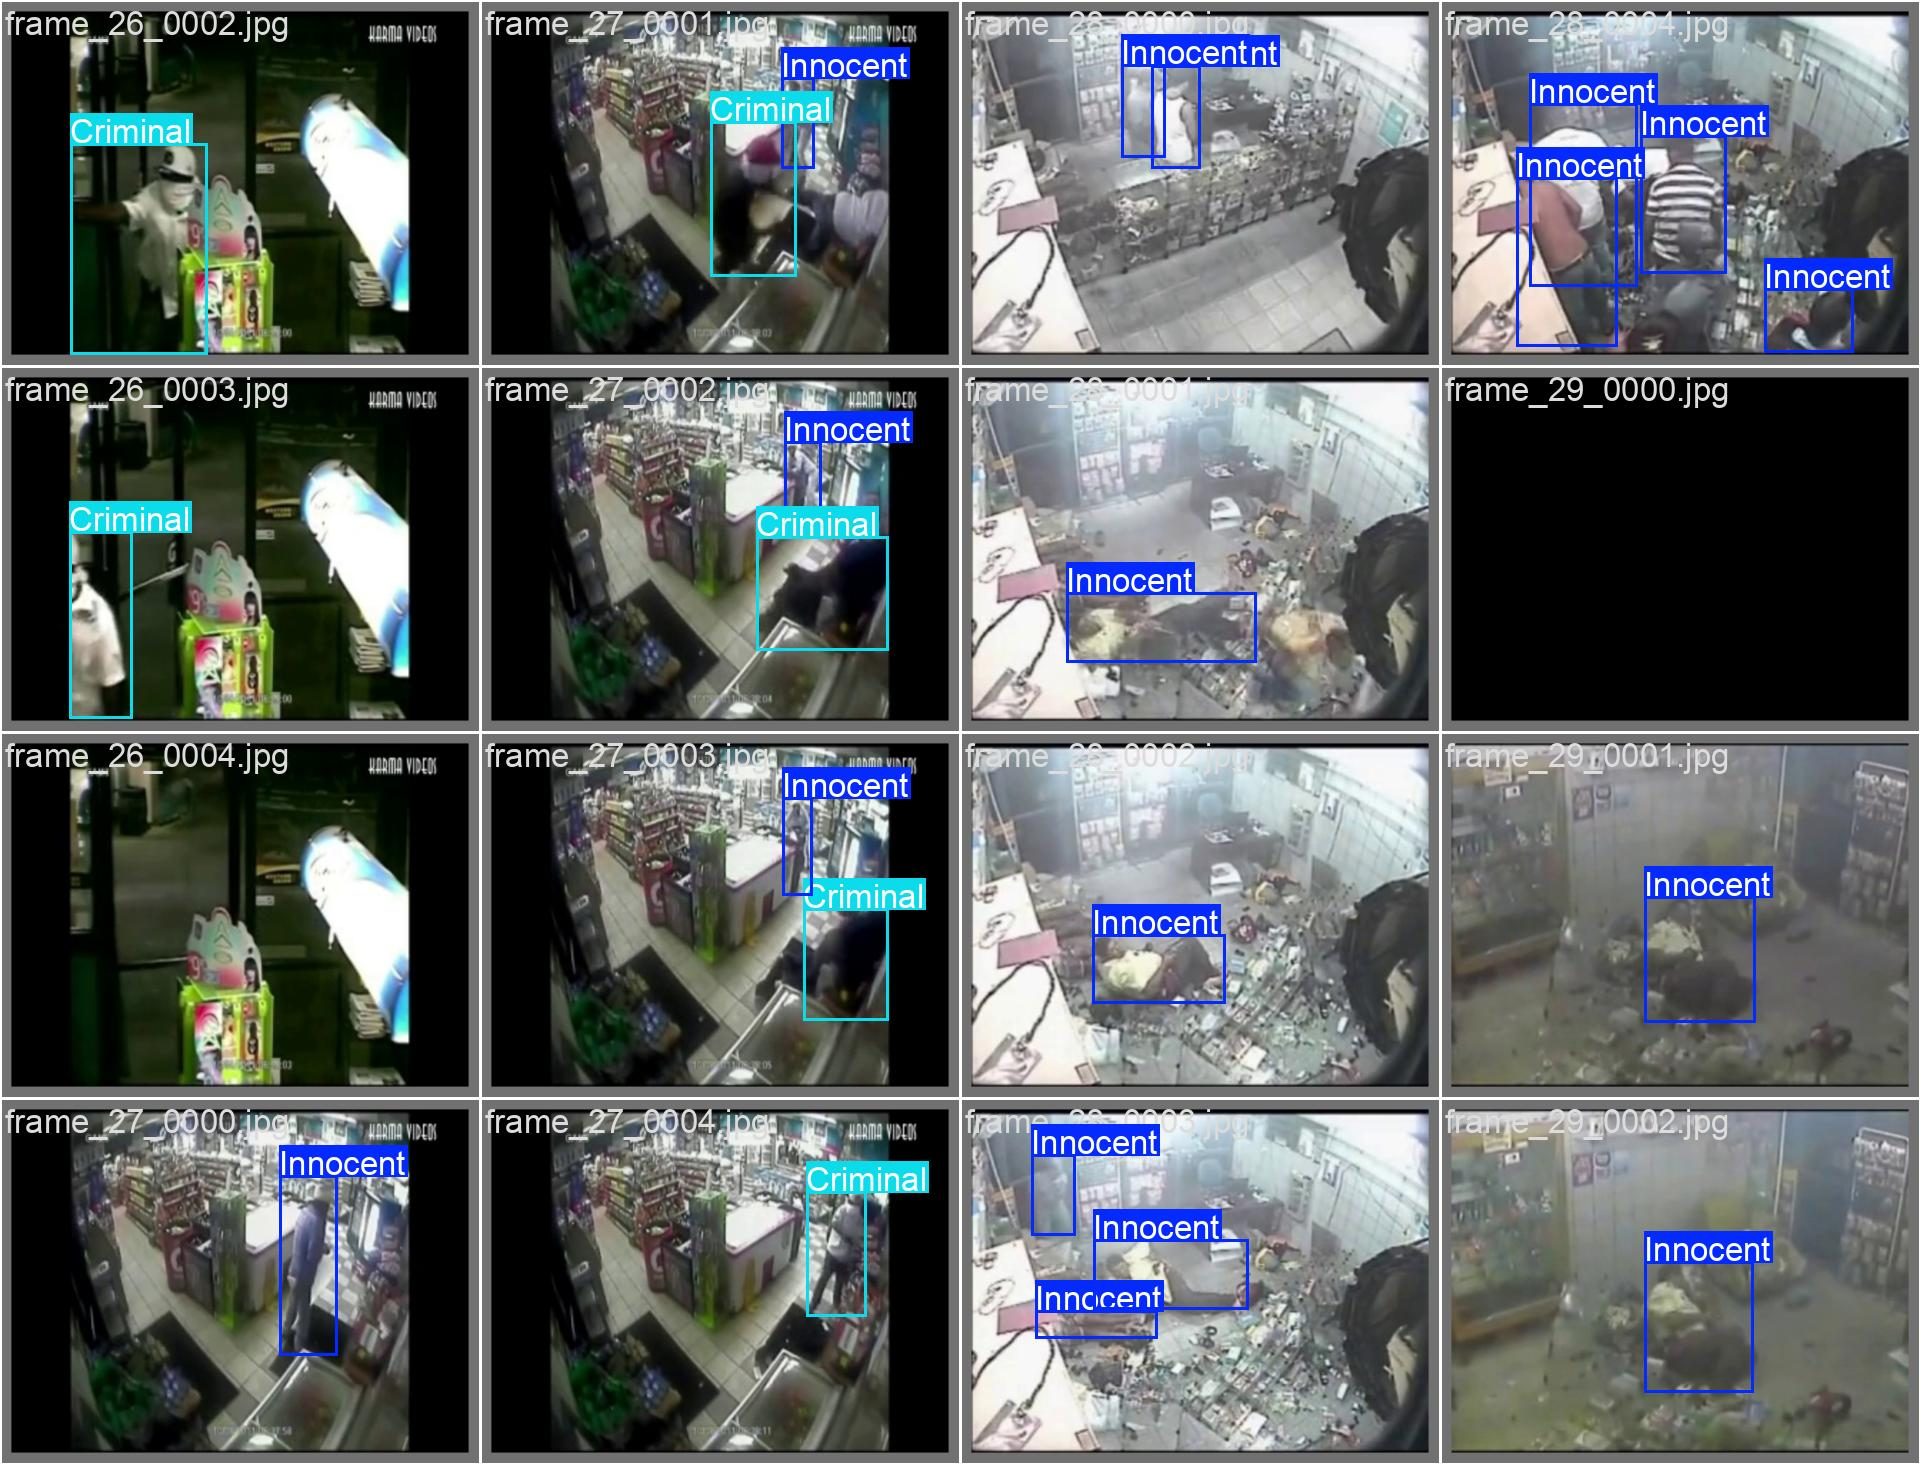
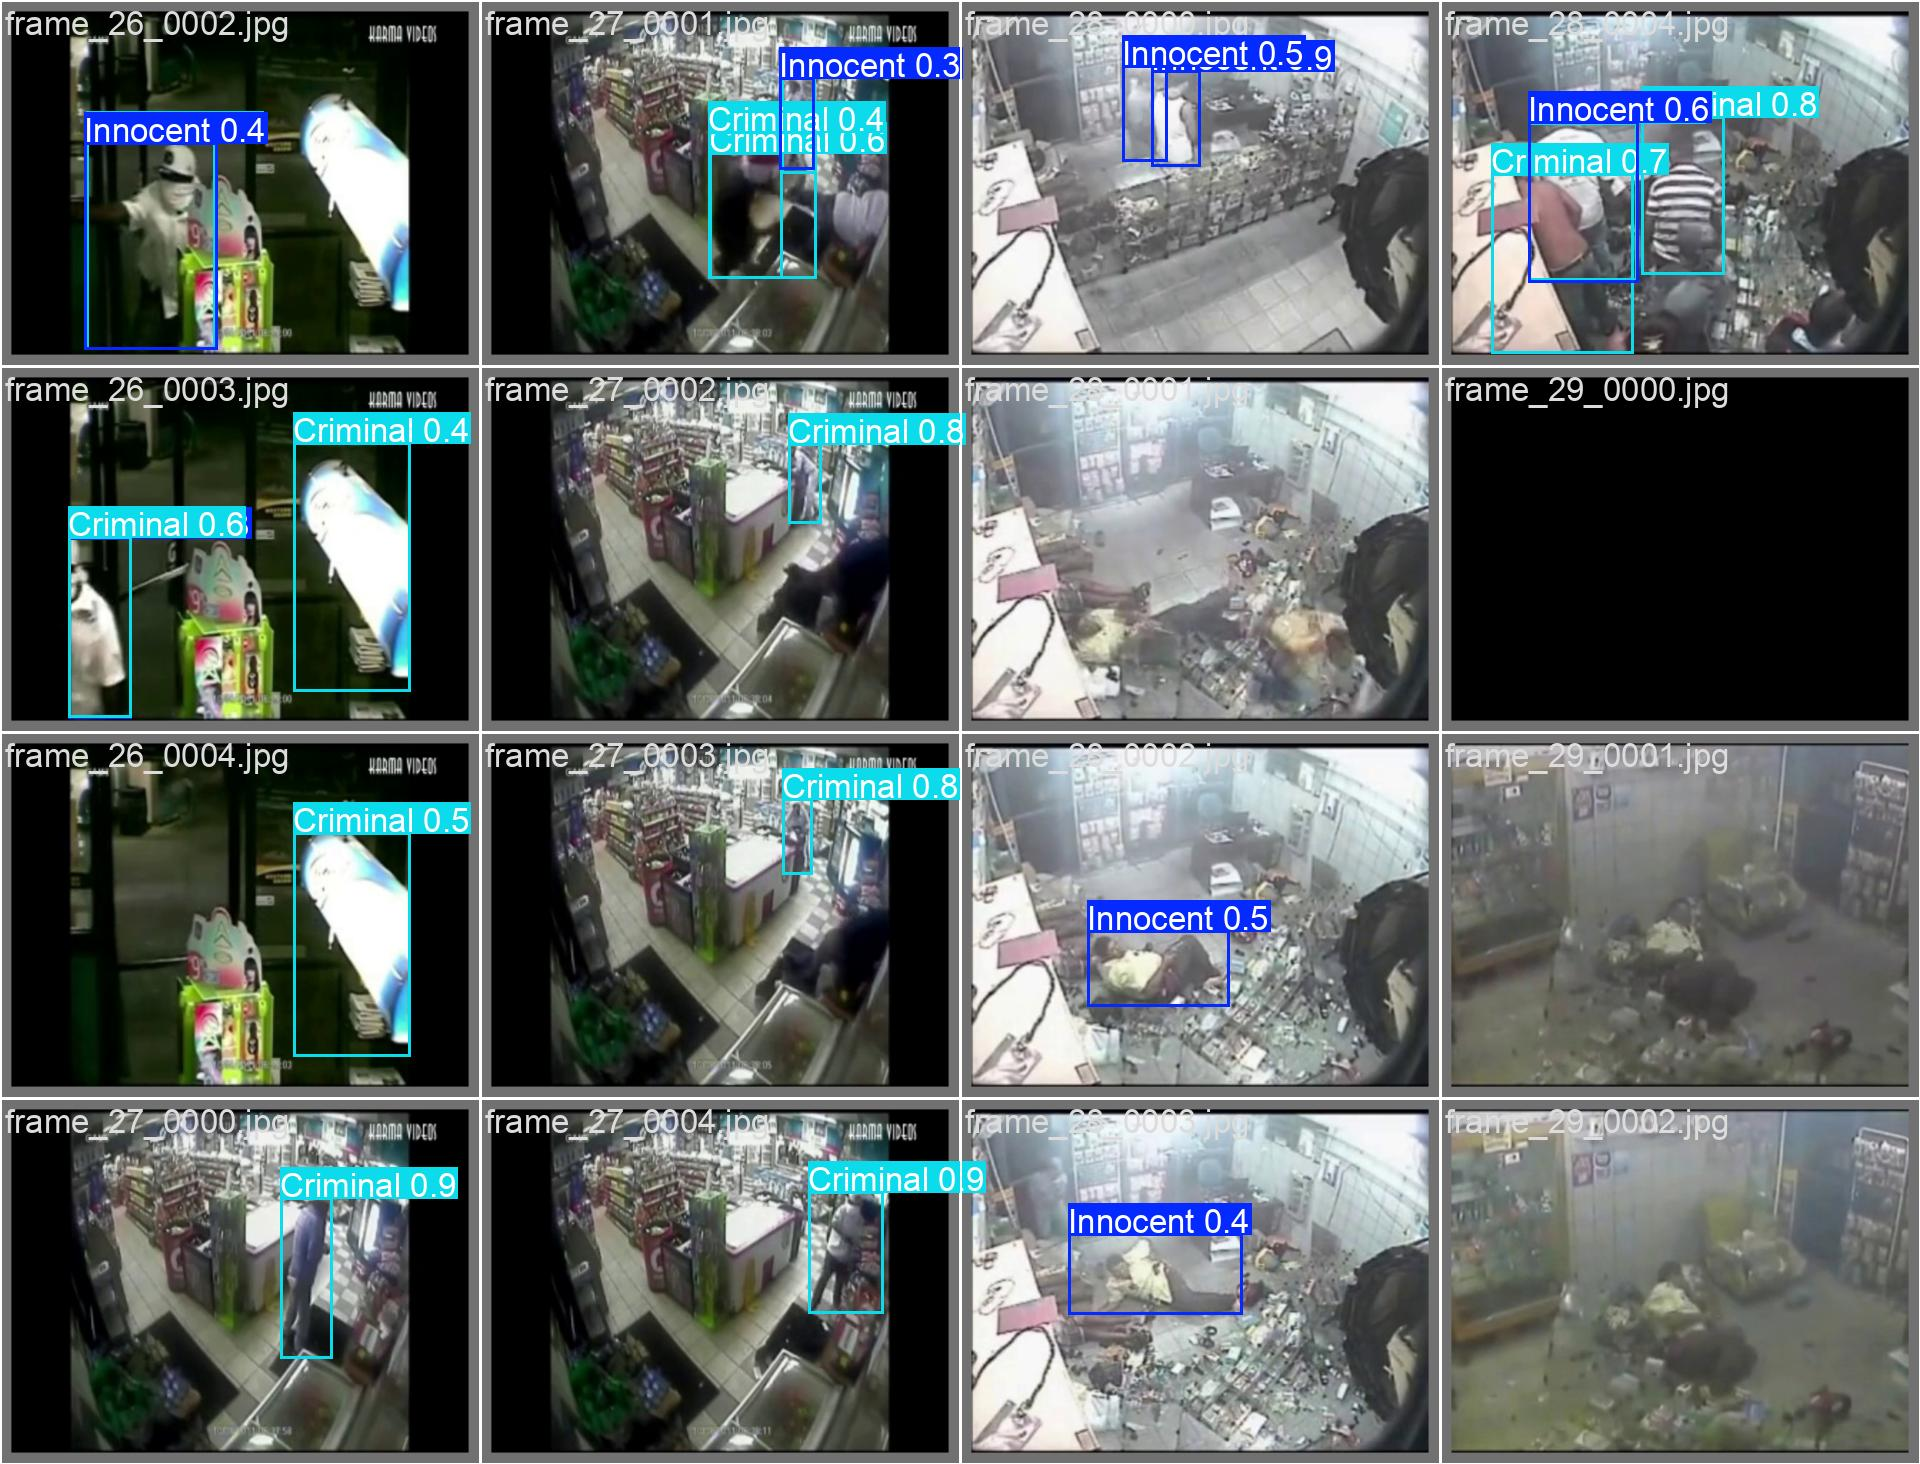

In [ ]:
from IPython.display import Image, display, HTML
import os
import base64
import io

def image_to_base64(image_path):
    if os.path.exists(image_path):
        with open(image_path, 'rb') as f:
            encoded_image = base64.b64encode(f.read()).decode('ascii')
            return f'data:image/jpeg;base64,{encoded_image}'
    return None

for i in range(0, 3):
    val_labels_image_path_relative = os.path.join(results_dir, f'val_batch{i}_labels.jpg')
    val_pred_image_path_relative = os.path.join(results_dir, f'val_batch{i}_pred.jpg')

    label_img_src = image_to_base64(val_labels_image_path_relative)
    pred_img_src = image_to_base64(val_pred_image_path_relative)

    label_img_html = f'<img src="{label_img_src}" style="width: 100%; display: inline-block; margin-right: 1%;">' if label_img_src else f'<span>Error: \'{val_labels_image_path_relative}\' not found.</span>'
    pred_img_html = f'<img src="{pred_img_src}" style="width: 100%; display: inline-block;">' if pred_img_src else f'<span>Error: \'{val_pred_image_path_relative}\' not found.</span>'

    display(HTML(f"""
    <h3>Batch {i}: Ground Truth vs. Predictions</h3>
    <div style="display: flex; justify-content: space-between; align-items: flex-start;">
        <div style="width: 49%; text-align: center;">
            <h4>Ground Truth Labels</h4>
            {label_img_html}
        </div>
        <div style="width: 49%; text-align: center;">
            <h4>Model Predictions</h4>
            {pred_img_html}
        </div>
    </div>
    """))
